In [1]:
Escalation_Dimension = {
0:[0,1,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,40,41,43,47,49,55,57],
1:[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,34,35,36,37,38,40,43,45,46,47,49,51,54,55,56,58,59],
2:[0,1,2,3,4,6,9,11,12,13,14,15,16,17,18,19,21,22,23,24,25,27,29,30,31,32,35,36,37,38,39,40,41,43,44,45,46,47,48,49,50,51,52,53,55,58,59],
3:[0,1,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,21,22,24,29,30,31,32,37,40,47,49,55],
4:[3,13,19,24,29,30,31,32,34,42,43,44,45,46,48,49,50,51,52,53,54,55,56,58,59],
5:[0]
}

In [2]:
Escalation_Dimension_Post_Deterrence = {
0:[1,3,4,5,6,7,8,9,10,12,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,40,41,43,47,49,55,57],
1:[1,2,3,4,5,6,7,8,9,10,12,14,15,16,17,18,19,21,22,23,24,26,27,28,29,30,31,32,34,35,36,37,38,40,43,45,46,47,49,51,54,55,56,58,59],
2:[1,2,3,4,6,9,12,13,14,15,16,17,18,19,21,22,23,24,25,27,29,30,31,32,35,36,37,38,39,40,41,43,44,45,46,47,48,49,50,51,52,53,55,58,59],
3:[1,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,21,22,24,29,30,31,32,37,40,47,49,55],
4:[13,19,24,29,30,31,32,34,42,43,44,45,46,48,49,50,51,52,53,54,55,56,58,59],
5:[]
}

In [3]:
print('Since WWII:')
print(len(Escalation_Dimension[0]), ' diplomacy breakdowns')
print(len(Escalation_Dimension[1]), ' military buildups / exercise incidents')
print(len(Escalation_Dimension[2]), ' incidents coinciding weapon systems testing')
print(len(Escalation_Dimension[3]), ' incidents with conventional military contact')
print(len(Escalation_Dimension[4]), ' weapon systems accidents / averted war incidents')
print(len(Escalation_Dimension[5]), ' intentional nuclear strikes')


Since WWII:
43  diplomacy breakdowns
48  military buildups / exercise incidents
47  incidents coinciding weapon systems testing
30  incidents with conventional military contact
25  weapon systems accidents / averted war incidents
1  intentional nuclear strikes


In [4]:
print('Since the deterrance paradigm began:')
print(len(Escalation_Dimension_Post_Deterrence[0]), ' diplomacy breakdowns')
print(len(Escalation_Dimension_Post_Deterrence[1]), ' military buildups / exercise incidents')
print(len(Escalation_Dimension_Post_Deterrence[2]), ' incidents coinciding weapon systems testing')
print(len(Escalation_Dimension_Post_Deterrence[3]), ' incidents with conventional military contact')
print(len(Escalation_Dimension_Post_Deterrence[4]), ' weapon systems accidents / averted war incidents')
print(len(Escalation_Dimension_Post_Deterrence[5]), ' intentional nuclear strikes')

Since the deterrance paradigm began:
40  diplomacy breakdowns
45  military buildups / exercise incidents
45  incidents coinciding weapon systems testing
29  incidents with conventional military contact
24  weapon systems accidents / averted war incidents
0  intentional nuclear strikes


In [5]:
incident_levels = [i for i in Escalation_Dimension_Post_Deterrence.keys()]
print(incident_levels)

[0, 1, 2, 3, 4, 5]


In [6]:
count = [len(Escalation_Dimension_Post_Deterrence[i]) for i in incident_levels]
print(count)

[40, 45, 45, 29, 24, 0]


In [7]:
import pandas as pd

In [8]:
df_dict = {'incident_level': incident_levels, 'count':count}

df = pd.DataFrame(data=df_dict)
df

,incident_level,count
0,0,40
1,1,45
2,2,45
3,3,29
4,4,24
5,5,0


In [9]:
import matplotlib.pyplot as plt

In [10]:
df_nolaunch = df.iloc[:5]
df_nolaunch

,incident_level,count
0,0,40
1,1,45
2,2,45
3,3,29
4,4,24


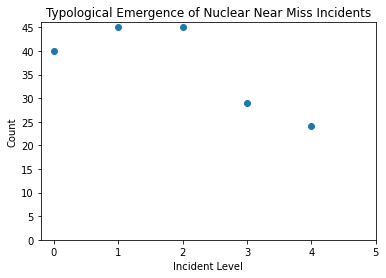

In [11]:
plt.scatter(df_nolaunch['incident_level'], df_nolaunch['count'])
plt.title('Typological Emergence of Nuclear Near Miss Incidents')
plt.xlabel('Incident Level')
plt.xticks(df['incident_level'])
plt.ylabel('Count')
plt.yticks(range(0,50,5))
plt.show()

In [12]:
# LOGARITHMIC DECAY

#  2^y = 30
#  y = log2(30)

In [13]:
import math

# math.e
# math.log(x, base)

In [14]:
for i in incident_levels[:4]:
  y = math.log(count[i+1],count[i])
  print(f'{i} to {i+1}: ', y)

0 to 1:  1.0319292178347081
1 to 2:  1.0
2 to 3:  0.884579559925641
3 to 4:  0.9438000077233224


In [15]:
increment = [i+0.5 for i in range(4)]
exponent = [math.log(count[i+1],count[i]) for i in incident_levels[:4]]
df_increment_dict = {'increment': increment, 'exponent':exponent}
print(df_increment_dict)

{'increment': [0.5, 1.5, 2.5, 3.5], 'exponent': [1.0319292178347081, 1.0, 0.884579559925641, 0.9438000077233224]}


In [16]:
df_increment = pd.DataFrame(data=df_increment_dict)
df_increment

,increment,exponent
0,0.5,1.031929
1,1.5,1.000000
2,2.5,0.884580
3,3.5,0.943800


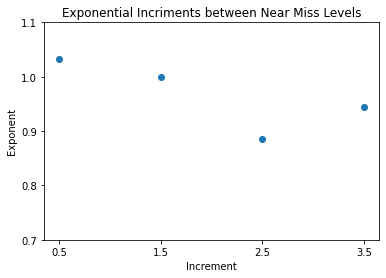

In [17]:
plt.scatter(df_increment['increment'], df_increment['exponent'])
plt.title('Exponential Incriments between Near Miss Levels')
plt.xlabel('Increment')
plt.xticks(df_increment['increment'])
plt.ylabel('Exponent')
plt.yticks([0.7,0.8,0.9, 1,1.1])
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
features = ['increment']
target = 'exponent'

X_train = df_increment[features]
y_train = df_increment[target]

model.fit(X_train, y_train)

print(model.coef_)
print(model.intercept_)

[-0.03798081]
1.0410388104526211


In [21]:
launch_exp = model.predict([[4.5]])
print(launch_exp)

[0.87012518]


In [22]:
import seaborn as sb

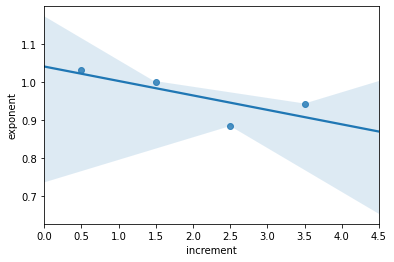

In [23]:
plt.xlim(0,4.5)
sb.regplot(x=df_increment['increment'], y=df_increment['exponent'], truncate=False);

In [24]:
increment_pred = increment
increment_pred.append(4.5)

exponent_pred = exponent
exponent_pred.append(launch_exp[0])

df_increment_log_dict = {'increment_pred':increment_pred, 'exponent_pred':exponent_pred}

# print(increment)
print(df_increment_log_dict)

{'increment_pred': [0.5, 1.5, 2.5, 3.5, 4.5], 'exponent_pred': [1.0319292178347081, 1.0, 0.884579559925641, 0.9438000077233224, 0.8701251787687888]}


In [25]:
df_increment_log = pd.DataFrame(data=df_increment_log_dict)
df_increment_log

,increment_pred,exponent_pred
0,0.5,1.031929
1,1.5,1.000000
2,2.5,0.884580
3,3.5,0.943800
4,4.5,0.870125


In [26]:
lambda_min_log = count[4] ** exponent_pred[-1]
print(lambda_min_log)

15.883878392550955


In [27]:
df_log_pred_dict = df_dict
df_log_pred_dict['count'][-1] = lambda_min_log
print(df_log_pred_dict)

{'incident_level': [0, 1, 2, 3, 4, 5], 'count': [40, 45, 45, 29, 24, 15.883878392550955]}


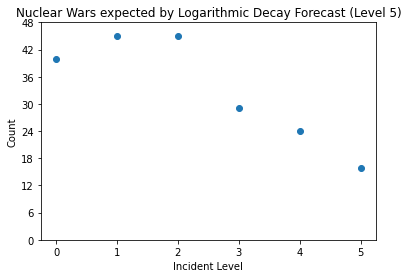

In [28]:
df_log_pred = pd.DataFrame(data=df_log_pred_dict)

plt.scatter(df_log_pred['incident_level'], df_log_pred['count'])
plt.title('Nuclear Wars expected by Logarithmic Decay Forecast (Level 5)')
plt.xlabel('Incident Level')
plt.xticks(df_log_pred['incident_level'])
plt.ylabel('Count')
plt.yticks(range(0,50,6))
plt.show()

# LOGARITHMS REGRESSED: THERE SHOULD HAVE BEEN ~16 NUCLEAR LAUNCHES SINCE 1949

In [32]:
# MULTIPLICATIVE DECAY (RATHER THAN LOGARITHMIC)

In [36]:
margin = [(count[i+1] / count[i]) for i in incident_levels[:4]]
df_mult_decay_dict = {'increment': increment[:-1], 'margin':margin}
print(df_mult_decay_dict)

{'increment': [0.5, 1.5, 2.5, 3.5], 'margin': [1.125, 1.0, 0.6444444444444445, 0.8275862068965517]}


In [37]:
df_mult_decay = pd.DataFrame(data=df_mult_decay_dict)
df_mult_decay

,increment,margin
0,0.5,1.125000
1,1.5,1.000000
2,2.5,0.644444
3,3.5,0.827586


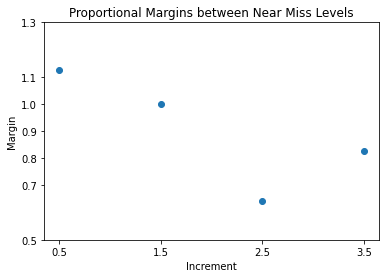

In [39]:
plt.scatter(df_mult_decay['increment'], df_mult_decay['margin'])
plt.title('Proportional Margins between Near Miss Levels')
plt.xlabel('Increment')
plt.xticks(df_mult_decay['increment'])
plt.ylabel('Margin')
plt.yticks([0.5,0.7,0.8,0.9, 1,1.1, 1.3])
plt.show()

In [42]:
model_m = LinearRegression()

In [44]:
target_m = 'margin'

X_train_m = df_mult_decay[features]
y_train_m = df_mult_decay[target_m]

model_m.fit(X_train_m, y_train_m)

print(model_m.coef_)
print(model_m.intercept_)

[-0.12477969]
1.148817049808429


In [45]:
launch_marg = model_m.predict([[4.5]])
print(launch_marg)

[0.58730843]


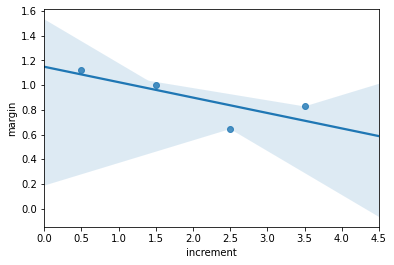

In [46]:
plt.xlim(0,4.5)
sb.regplot(x=df_mult_decay['increment'], y=df_mult_decay['margin'], truncate=False);

In [47]:
margin_pred = margin
margin_pred.append(launch_marg[0])

df_mult_decay_pred_dict = {'increment_pred':increment_pred, 'margin_pred':margin_pred}

# print(increment)
print(df_mult_decay_pred_dict)

{'increment_pred': [0.5, 1.5, 2.5, 3.5, 4.5], 'margin_pred': [1.125, 1.0, 0.6444444444444445, 0.8275862068965517, 0.5873084291187739]}


In [48]:
df_mult_decay_pred = pd.DataFrame(data=df_mult_decay_pred_dict)
df_mult_decay_pred

,increment_pred,margin_pred
0,0.5,1.125000
1,1.5,1.000000
2,2.5,0.644444
3,3.5,0.827586
4,4.5,0.587308


In [49]:
lambda_min_mult = count[4] * margin_pred[-1]
print(lambda_min_mult)

14.095402298850573


In [50]:
df_prop_pred_dict = df_dict
df_prop_pred_dict['count'][-1] = lambda_min_mult
print(df_prop_pred_dict)

{'incident_level': [0, 1, 2, 3, 4, 5], 'count': [40, 45, 45, 29, 24, 14.095402298850573]}


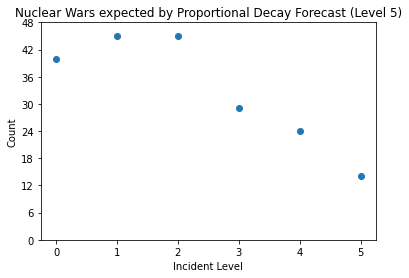

In [51]:
df_prop_pred = pd.DataFrame(data=df_prop_pred_dict)

plt.scatter(df_prop_pred['incident_level'], df_prop_pred['count'])
plt.title('Nuclear Wars expected by Proportional Decay Forecast (Level 5)')
plt.xlabel('Incident Level')
plt.xticks(df_prop_pred['incident_level'])
plt.ylabel('Count')
plt.yticks(range(0,50,6))
plt.show()

# PROPORTIONS REGRESSED: THERE SHOULD HAVE BEEN ~14 NUCLEAR LAUNCHES SINCE 1949

In [30]:
# LINEAR REGRESSION DECAY

In [31]:
# we would have expected N number of nuclear launches (level 5) since 1949, so
# what are the odds that we instead had 0?